# Requirements

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

## Customer Personality Analysis

## Read the dataset

# Dataset Description

## Attributes

### People
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years

### Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

### Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

### Target
The column Response is the prediction target.
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


In [ ]:
# Write your code here. Add as many boxes as you need.


Load the dataset into a `pandas` data frame.

In [3]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('marketing_campaign.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,5524.0,1957.0,Graduation,Single,58138.0,NaN,NaN,4/9/2012,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,NaN,1954.0,NaN,Single,46344.0,1.0,1.0,8/3/2014,NaN,NaN,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,4141.0,1965.0,Graduation,NaN,71613.0,NaN,0.0,21-08-2013,26.0,NaN,49.0,42.0,NaN,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,6182.0,1984.0,Graduation,NaN,26646.0,1.0,0.0,10/2/2014,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,5324.0,NaN,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870.0,1967.0,Graduation,Married,61223.0,0.0,1.0,13-06-2013,46.0,709.0,43.0,247.0,2.0,NaN,3.0,4.0,NaN,NaN,0.0,NaN
2236,4001.0,1946.0,PhD,Together,NaN,2.0,1.0,10/6/2014,56.0,406.0,0.0,NaN,7.0,NaN,2.0,5.0,7.0,1.0,0.0,0.0
2237,7270.0,1981.0,Graduation,Divorced,NaN,0.0,NaN,25-01-2014,91.0,908.0,48.0,24.0,1.0,2.0,3.0,13.0,NaN,0.0,NaN,0.0
2238,8235.0,1956.0,Master,NaN,69245.0,0.0,1.0,NaN,8.0,428.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0


Explore the dataset using visualizations of your choice.

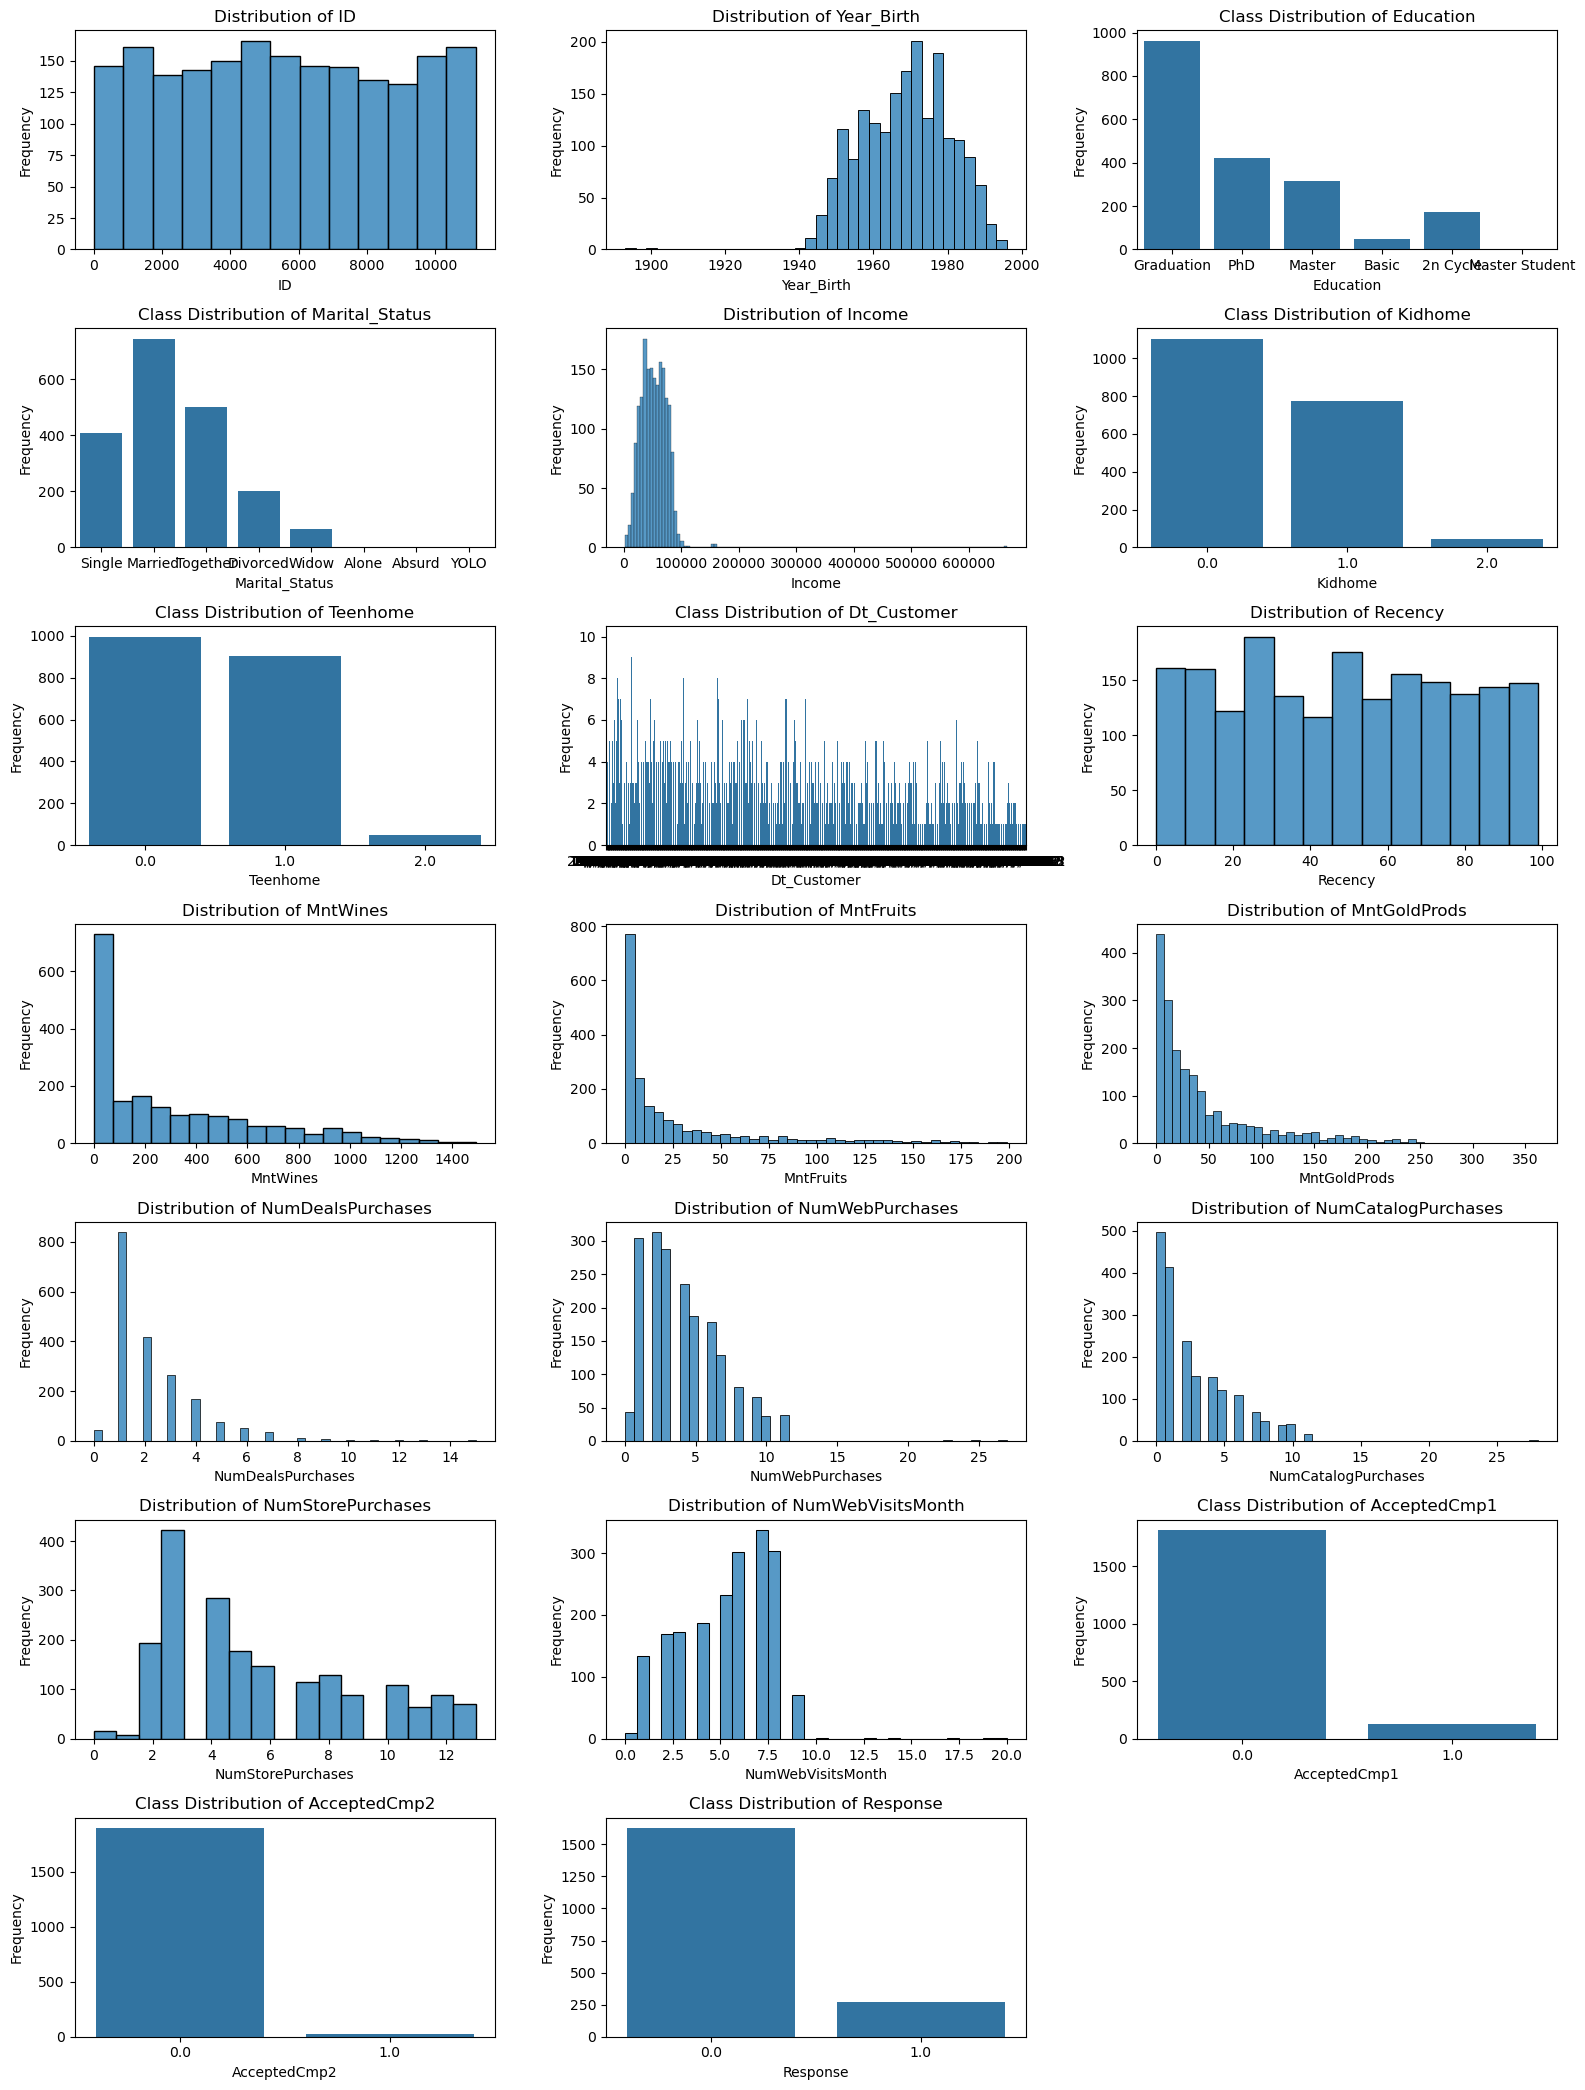

In [5]:
# Write your code here. Add as many boxes as you need.
# Calculate the number of rows and columns needed
num_features = len(df.columns)
num_cols = 3  # Set a fixed number of columns
num_rows = math.ceil(num_features / num_cols)  # Calculate rows needed based on columns

# Plot each feature's distribution
plt.figure(figsize=(16, num_rows * 3))
for i, feature in enumerate(df.columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Dynamically set subplot position
    if df[feature].dtype == 'object' or len(df[feature].unique()) <= 10:  # Countplot for categorical features
        sns.countplot(x=feature, data=df)
        plt.title(f'Class Distribution of {feature}')
    else:  # Histogram for continuous features
        sns.histplot(df[feature])
        plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Check if the dataset is balanced.

<function matplotlib.pyplot.show(close=None, block=None)>

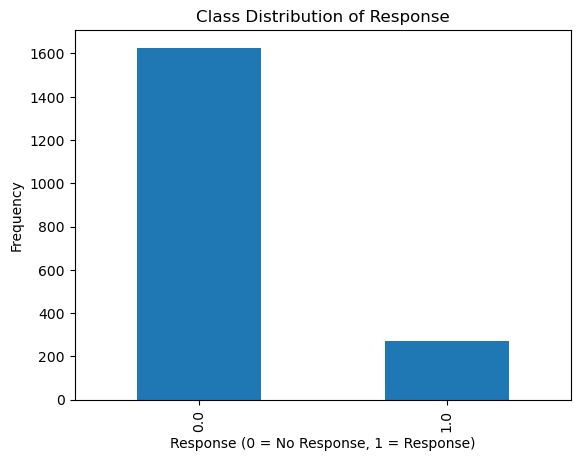

In [6]:
# Write your code here. Add as many boxes as you need.

df['Response'].value_counts().plot.bar()
plt.title('Class Distribution of Response')
plt.xlabel('Response (0 = No Response, 1 = Response)')
plt.ylabel('Frequency')
plt.show

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [9]:
# Write your code here. Add as many boxes as you need.
df.isnull().sum()

ID                     308
Year_Birth             315
Education              319
Marital_Status         316
Income                 385
Kidhome                319
Teenhome               290
Dt_Customer            311
Recency                310
MntWines               333
MntFruits              310
MntGoldProds           319
NumDealsPurchases      304
NumWebPurchases        333
NumCatalogPurchases    340
NumStorePurchases      325
NumWebVisitsMonth      313
AcceptedCmp1           296
AcceptedCmp2           318
Response               340
dtype: int64

In [11]:
missing_percent = df.isnull().sum()/len(df)*100
missing_percent

ID                     13.750000
Year_Birth             14.062500
Education              14.241071
Marital_Status         14.107143
Income                 17.187500
Kidhome                14.241071
Teenhome               12.946429
Dt_Customer            13.883929
Recency                13.839286
MntWines               14.866071
MntFruits              13.839286
MntGoldProds           14.241071
NumDealsPurchases      13.571429
NumWebPurchases        14.866071
NumCatalogPurchases    15.178571
NumStorePurchases      14.508929
NumWebVisitsMonth      13.973214
AcceptedCmp1           13.214286
AcceptedCmp2           14.196429
Response               15.178571
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

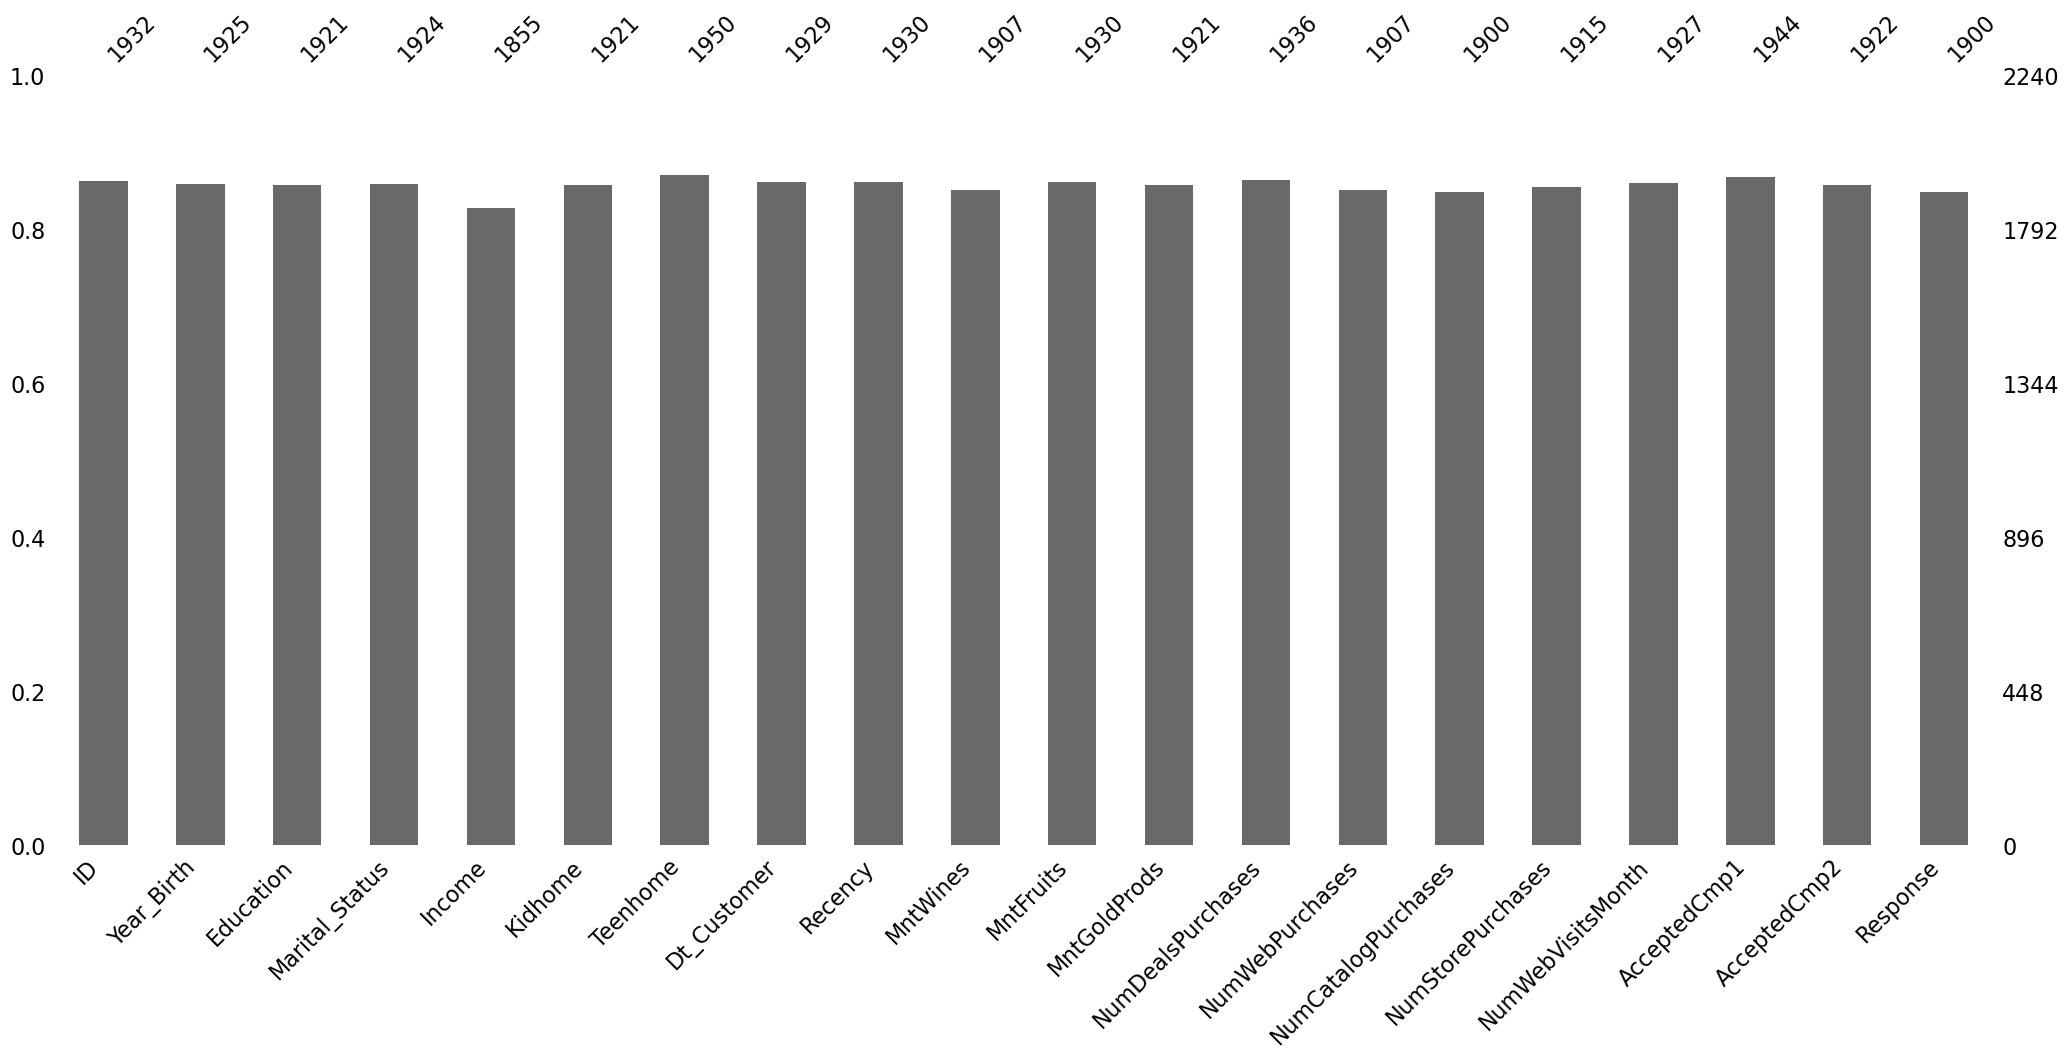

In [13]:
# Write your code here. Add as many boxes as you need.
msno.bar(df)
plt.show()

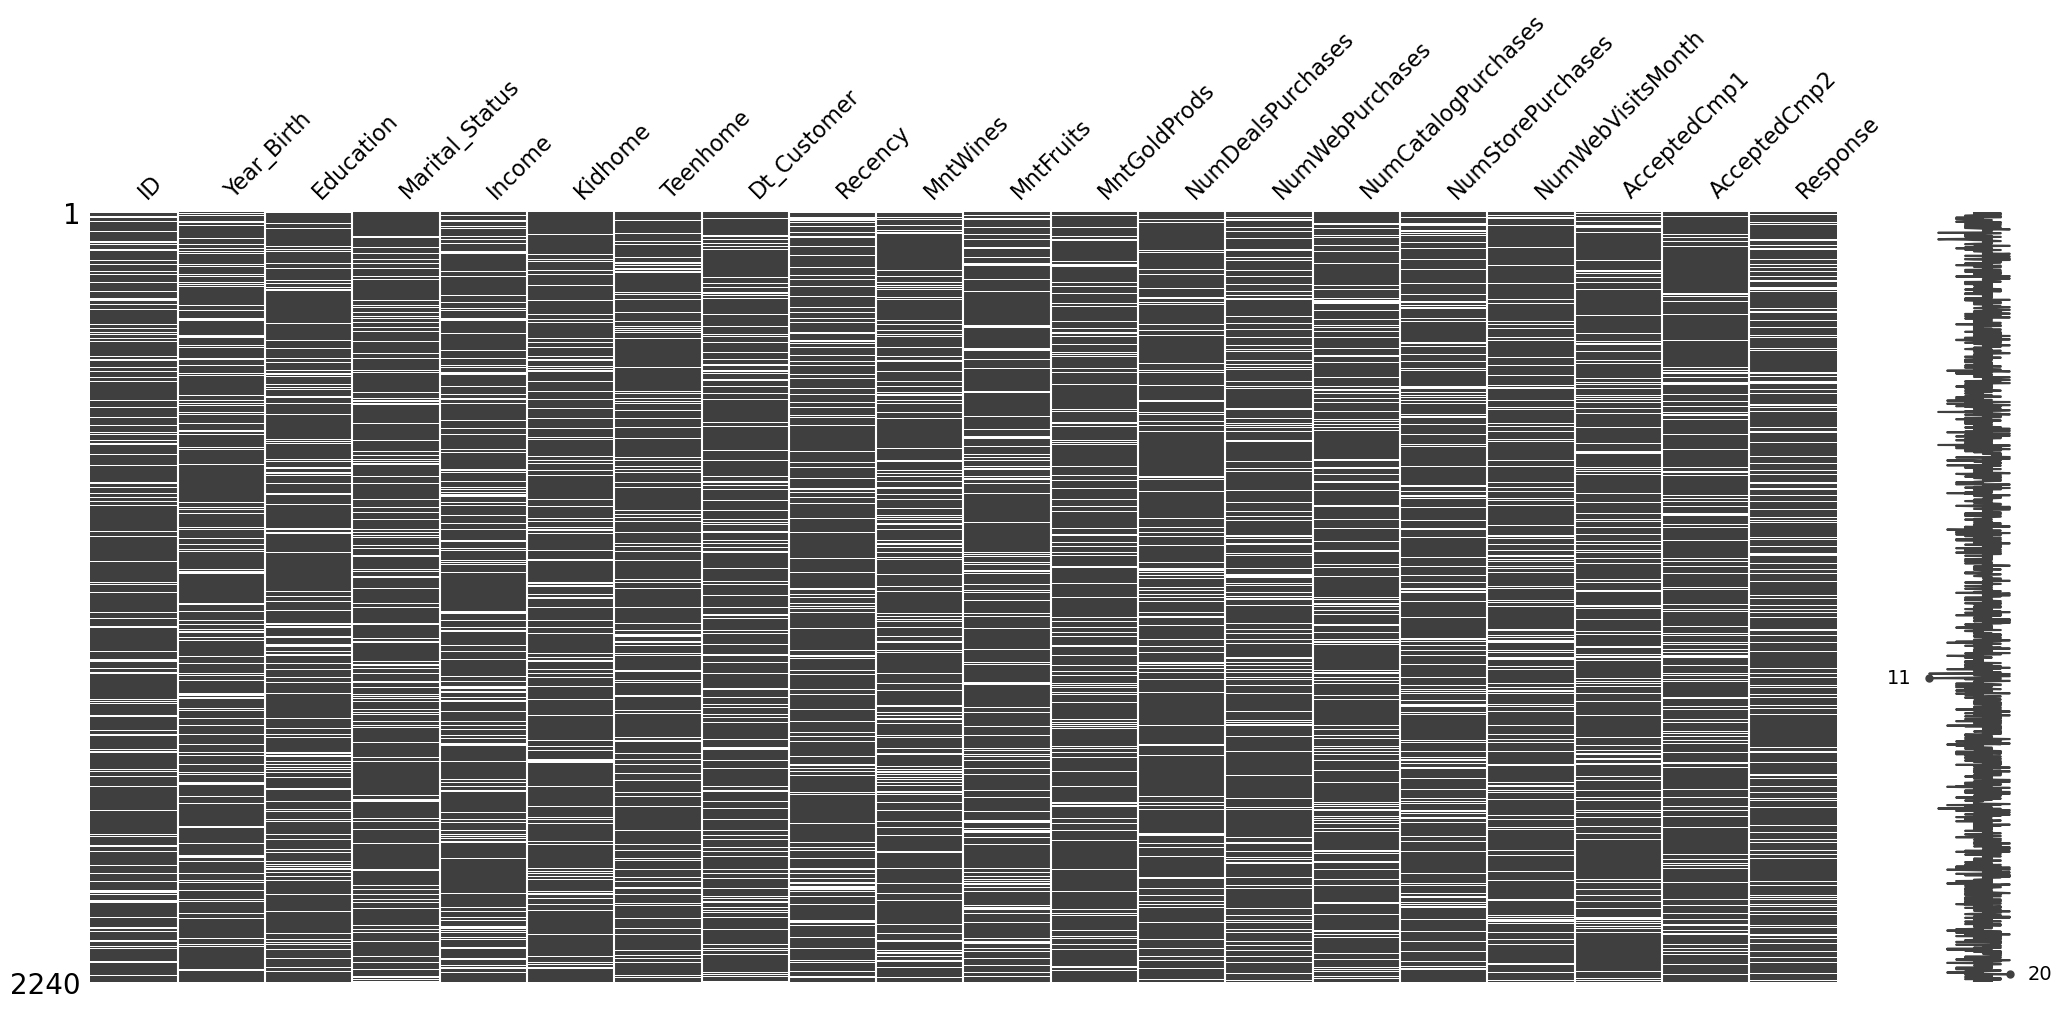

In [15]:
msno.matrix(df)
plt.show()

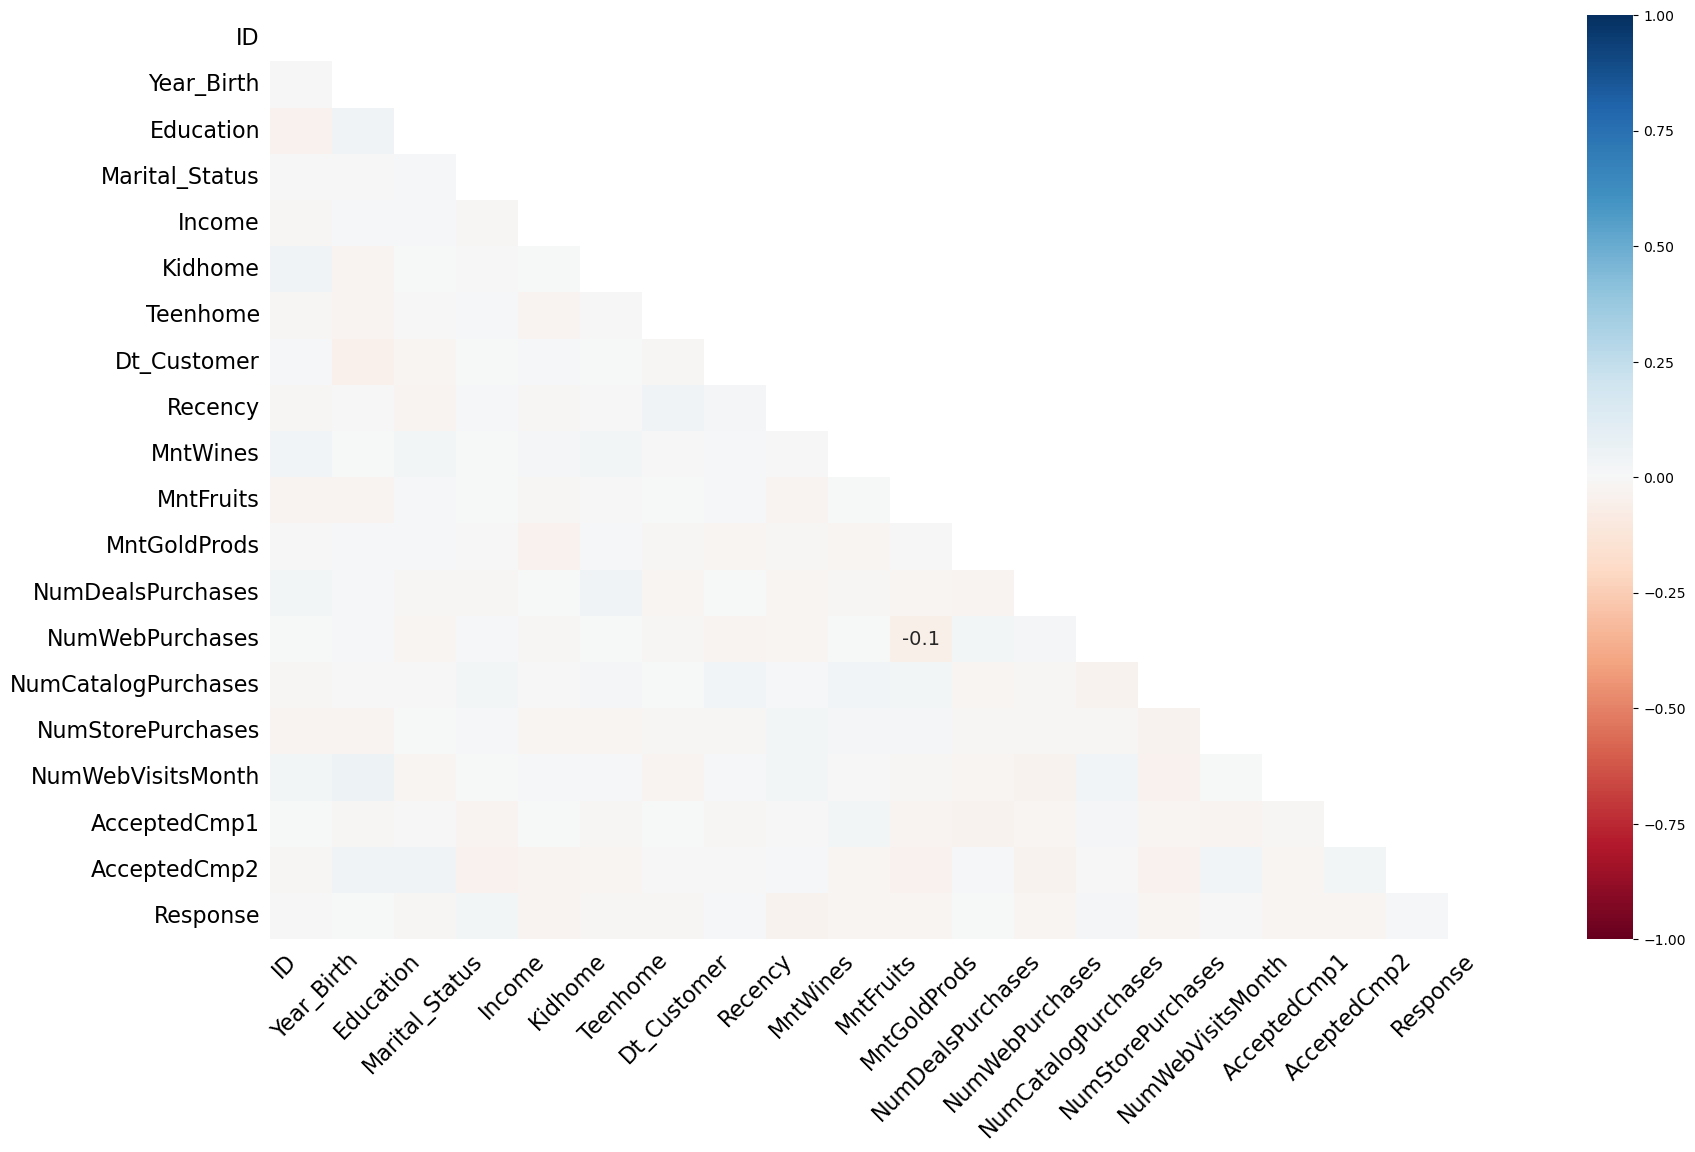

In [17]:
msno.heatmap(df)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [19]:
# Write your code here. Add as many boxes as you need.
df = df.drop(['Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer'], axis=1)

In [21]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response'],
      dtype='object')

In [23]:
df.ID = df.ID.fillna(df.ID.median())

<Axes: xlabel='Education'>

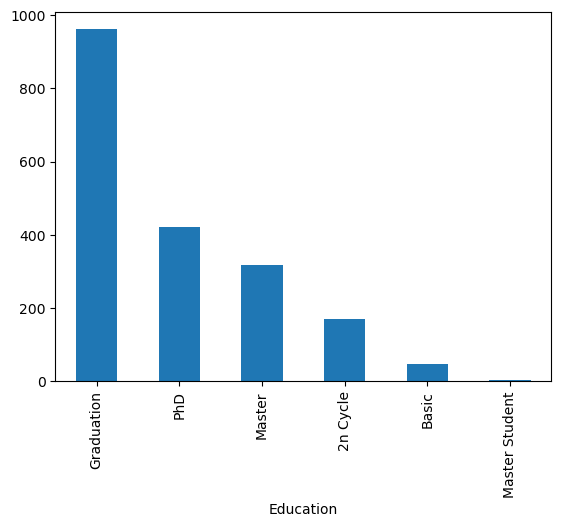

In [25]:
df.Education.value_counts().plot.bar()

In [27]:
# imputer = SimpleImputer(strategy='most_frequent')
# df['Education'] = imputer.fit_transform([df['Education']])[0]

df['Education']=df['Education'].replace('nan', np.nan)

# Use the SimpleImputer to fill missing values
imputer = SimpleImputer(strategy='most_frequent')
df['Education'] = imputer.fit_transform(df[['Education']]).ravel()

# Convert back to string type if necessary
df['Education'] = df['Education'].astype(str)
df.Education.isnull().sum()

0

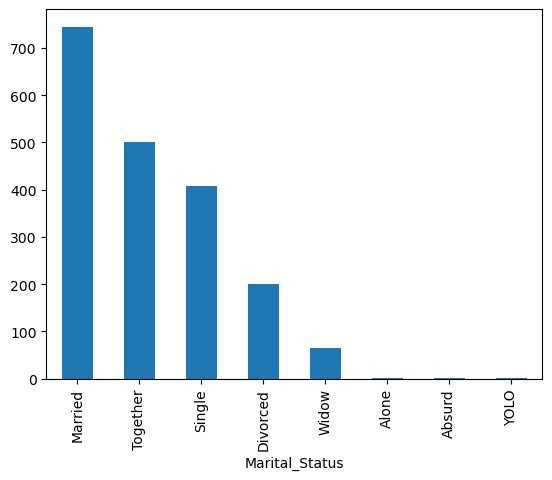

In [29]:
df.Marital_Status.value_counts().plot.bar()
plt.show()

In [31]:
df['Marital_Status'] = df['Marital_Status'].replace('nan', np.nan)

frequent_imputer = SimpleImputer(strategy='most_frequent')

df['Marital_Status'] = frequent_imputer.fit_transform(df[['Marital_Status']]).ravel()
df['Marital_Status'] = df['Marital_Status'].astype(str)

df.Education.isnull().sum()

0

In [33]:
df.head(20)

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,5524.0,Graduation,Single,58138.0,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,5468.0,Graduation,Single,46344.0,NaN,NaN,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,4141.0,Graduation,Married,71613.0,26.0,NaN,49.0,42.0,NaN,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,6182.0,Graduation,Married,26646.0,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,5324.0,PhD,Married,58293.0,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,NaN,0.0,0.0
5,7446.0,Master,Together,NaN,NaN,520.0,42.0,NaN,2.0,6.0,4.0,10.0,6.0,0.0,0.0,0.0
6,965.0,Graduation,Divorced,55635.0,34.0,235.0,65.0,27.0,4.0,7.0,3.0,7.0,6.0,0.0,0.0,0.0
7,6177.0,PhD,Married,33454.0,32.0,76.0,10.0,23.0,2.0,4.0,0.0,4.0,8.0,0.0,0.0,NaN
8,4855.0,PhD,Together,30351.0,19.0,NaN,0.0,2.0,NaN,3.0,0.0,2.0,9.0,0.0,0.0,1.0
9,5899.0,PhD,Together,5648.0,68.0,28.0,NaN,13.0,1.0,NaN,NaN,0.0,20.0,0.0,0.0,0.0


In [35]:
df.Income = df.Income.fillna(df.Income.median())

In [37]:
df.head(20)

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,5524.0,Graduation,Single,58138.0,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,5468.0,Graduation,Single,46344.0,NaN,NaN,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,4141.0,Graduation,Married,71613.0,26.0,NaN,49.0,42.0,NaN,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,6182.0,Graduation,Married,26646.0,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,5324.0,PhD,Married,58293.0,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,NaN,0.0,0.0
5,7446.0,Master,Together,51390.0,NaN,520.0,42.0,NaN,2.0,6.0,4.0,10.0,6.0,0.0,0.0,0.0
6,965.0,Graduation,Divorced,55635.0,34.0,235.0,65.0,27.0,4.0,7.0,3.0,7.0,6.0,0.0,0.0,0.0
7,6177.0,PhD,Married,33454.0,32.0,76.0,10.0,23.0,2.0,4.0,0.0,4.0,8.0,0.0,0.0,NaN
8,4855.0,PhD,Together,30351.0,19.0,NaN,0.0,2.0,NaN,3.0,0.0,2.0,9.0,0.0,0.0,1.0
9,5899.0,PhD,Together,5648.0,68.0,28.0,NaN,13.0,1.0,NaN,NaN,0.0,20.0,0.0,0.0,0.0


In [39]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['MntWines','MntFruits','MntGoldProds']])

In [41]:
knn_imputer = KNNImputer(n_neighbors=3)
imputed_data = knn_imputer.fit_transform(scaled_data)
df[['MntWines','MntFruits','MntGoldProds']] = scaler.inverse_transform(imputed_data)

In [43]:
df.isnull().sum()

ID                       0
Education                0
Marital_Status           0
Income                   0
Recency                310
MntWines                 0
MntFruits                0
MntGoldProds             0
NumDealsPurchases      304
NumWebPurchases        333
NumCatalogPurchases    340
NumStorePurchases      325
NumWebVisitsMonth      313
AcceptedCmp1           296
AcceptedCmp2           318
Response               340
dtype: int64

In [45]:
df.Recency = df.Recency.fillna(df.Recency.median())

In [47]:
df.isnull().sum()

ID                       0
Education                0
Marital_Status           0
Income                   0
Recency                  0
MntWines                 0
MntFruits                0
MntGoldProds             0
NumDealsPurchases      304
NumWebPurchases        333
NumCatalogPurchases    340
NumStorePurchases      325
NumWebVisitsMonth      313
AcceptedCmp1           296
AcceptedCmp2           318
Response               340
dtype: int64

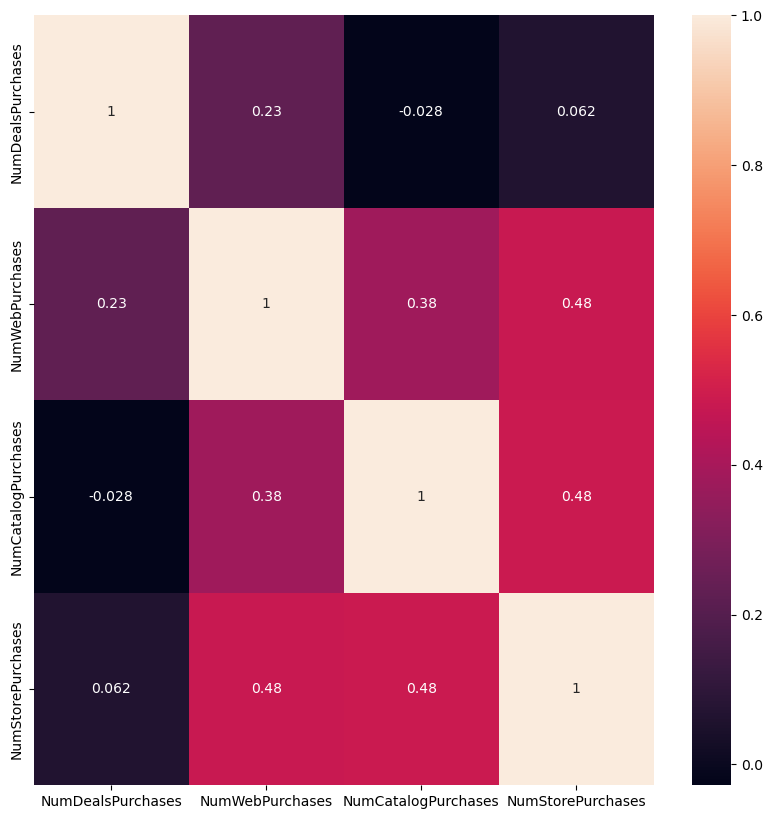

In [49]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].corr(), annot=True)
plt.show()

In [51]:
mice_imputer = IterativeImputer()
df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']] = mice_imputer.fit_transform(df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']])

In [53]:
df.NumWebVisitsMonth = df.NumWebVisitsMonth.fillna(df.NumWebVisitsMonth.median())

In [55]:
impute_constant = SimpleImputer(strategy='constant', fill_value=False)
df['AcceptedCmp1'] = impute_constant.fit_transform([df['AcceptedCmp1']])[0]
df['AcceptedCmp2'] = impute_constant.fit_transform([df['AcceptedCmp2']])[0]
df['Response'] = impute_constant.fit_transform([df['Response']])[0]
df.isnull().sum()

ID                     0
Education              0
Marital_Status         0
Income                 0
Recency                0
MntWines               0
MntFruits              0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
dtype: int64

In [57]:
df['Education'].value_counts()

Education
Graduation        1281
PhD                421
Master             317
2n Cycle           171
Basic               48
Master Student       2
Name: count, dtype: int64

In [59]:
education_encoding = {
    "Basic": 0,
    "Graduation": 1,
    "2n Cycle": 2,
    "Master": 3,
    "Master Student": 4,
    "PhD": 5
}

In [61]:
def encode_education(education):
    return education_encoding[education]

In [63]:
df['Education'] = df['Education'].apply(encode_education)

In [65]:
df['Marital_Status'].value_counts()

Marital_Status
Married     1061
Together     501
Single       407
Divorced     200
Widow         66
Alone          2
Absurd         2
YOLO           1
Name: count, dtype: int64

In [67]:
status_encoding = {
    "Single": 0,
    "Together": 1,
    "Married": 2,
    "Divorced": 3,
    "Widow": 4,
    "Alone": 5,
    "Absurd": 6,
    "YOLO": 7
}

In [69]:
def encode_status(status):
    return status_encoding[status]

In [71]:
df['Marital_Status'] = df['Marital_Status'].apply(encode_status)

In [73]:
df.head(30)

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,5524.0,1,0,58138.0,58.0,635.000000,88.000000,88.000000,3.000000,8.000000,10.000000,4.000000,7.0,0.0,0.0,1.0
1,5468.0,1,0,46344.0,49.0,59.666667,1.000000,6.000000,2.000000,1.000000,1.000000,2.000000,5.0,0.0,0.0,0.0
2,4141.0,1,2,71613.0,26.0,344.333333,49.000000,42.000000,3.184619,8.000000,2.000000,10.000000,4.0,0.0,0.0,0.0
3,6182.0,1,2,26646.0,26.0,11.000000,4.000000,5.000000,2.000000,2.000000,0.000000,4.000000,6.0,0.0,0.0,0.0
4,5324.0,5,2,58293.0,94.0,173.000000,43.000000,15.000000,5.000000,5.000000,3.000000,6.000000,5.0,0.0,0.0,0.0
5,7446.0,3,1,51390.0,49.0,520.000000,42.000000,91.666667,2.000000,6.000000,4.000000,10.000000,6.0,0.0,0.0,0.0
6,965.0,1,3,55635.0,34.0,235.000000,65.000000,27.000000,4.000000,7.000000,3.000000,7.000000,6.0,0.0,0.0,0.0
7,6177.0,5,2,33454.0,32.0,76.000000,10.000000,23.000000,2.000000,4.000000,0.000000,4.000000,8.0,0.0,0.0,0.0
8,4855.0,5,1,30351.0,19.0,460.666667,0.000000,2.000000,2.398674,3.000000,0.000000,2.000000,9.0,0.0,0.0,1.0
9,5899.0,5,1,5648.0,68.0,28.000000,9.000000,13.000000,1.000000,1.082393,-0.052335,0.000000,20.0,0.0,0.0,0.0


In [75]:
df

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,5524.0,1,0,58138.0,58.0,635.000000,88.0,88.000000,3.000000,8.000000,10.0,4.0,7.0,0.0,0.0,1.0
1,5468.0,1,0,46344.0,49.0,59.666667,1.0,6.000000,2.000000,1.000000,1.0,2.0,5.0,0.0,0.0,0.0
2,4141.0,1,2,71613.0,26.0,344.333333,49.0,42.000000,3.184619,8.000000,2.0,10.0,4.0,0.0,0.0,0.0
3,6182.0,1,2,26646.0,26.0,11.000000,4.0,5.000000,2.000000,2.000000,0.0,4.0,6.0,0.0,0.0,0.0
4,5324.0,5,2,58293.0,94.0,173.000000,43.0,15.000000,5.000000,5.000000,3.0,6.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870.0,1,2,61223.0,46.0,709.000000,43.0,247.000000,2.000000,3.430655,3.0,4.0,6.0,0.0,0.0,0.0
2236,4001.0,5,1,51390.0,56.0,406.000000,0.0,16.666667,7.000000,5.363409,2.0,5.0,7.0,1.0,0.0,0.0
2237,7270.0,1,3,51390.0,91.0,908.000000,48.0,24.000000,1.000000,2.000000,3.0,13.0,6.0,0.0,0.0,0.0
2238,8235.0,3,2,69245.0,8.0,428.000000,30.0,61.000000,2.000000,6.000000,5.0,10.0,3.0,0.0,0.0,0.0


In [77]:
# Columns to scale
columns_to_scale = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntGoldProds', 
                    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                    'NumStorePurchases', 'NumWebVisitsMonth']

# Initialize scaler
scaler = MinMaxScaler()

# Apply the scaler to the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [79]:
df

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,5524.0,1,0,0.084832,0.585859,0.425318,0.442211,0.243094,0.200000,0.296296,0.358342,0.307692,0.35,0.0,0.0,1.0
1,5468.0,1,0,0.067095,0.494949,0.039964,0.005025,0.016575,0.133333,0.037037,0.037513,0.153846,0.25,0.0,0.0,0.0
2,4141.0,1,2,0.105097,0.262626,0.230632,0.246231,0.116022,0.212308,0.296296,0.073161,0.769231,0.20,0.0,0.0,0.0
3,6182.0,1,2,0.037471,0.262626,0.007368,0.020101,0.013812,0.133333,0.074074,0.001866,0.307692,0.30,0.0,0.0,0.0
4,5324.0,5,2,0.085065,0.949495,0.115874,0.216080,0.041436,0.333333,0.185185,0.108809,0.461538,0.25,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870.0,1,2,0.089472,0.464646,0.474883,0.216080,0.682320,0.133333,0.127061,0.108809,0.307692,0.30,0.0,0.0,0.0
2236,4001.0,5,1,0.074684,0.565657,0.271936,0.000000,0.046041,0.466667,0.198645,0.073161,0.384615,0.35,1.0,0.0,0.0
2237,7270.0,1,3,0.074684,0.919192,0.608171,0.241206,0.066298,0.066667,0.074074,0.108809,1.000000,0.30,0.0,0.0,0.0
2238,8235.0,3,2,0.101536,0.080808,0.286671,0.150754,0.168508,0.133333,0.222222,0.180104,0.769231,0.15,0.0,0.0,0.0


In [81]:
df.describe()

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5563.695982,2.092411,1.569643,0.076015,0.492541,0.206249,0.130305,0.124323,0.154559,0.151649,0.097369,0.442665,0.271116,0.057589,0.011161,0.121875
std,3011.898715,1.576949,1.003152,0.035327,0.270517,0.215085,0.190587,0.141573,0.119251,0.098731,0.100002,0.238021,0.112795,0.233017,0.105077,0.327214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3248.750000,1.000000,1.000000,0.055416,0.282828,0.019424,0.010050,0.027624,0.066667,0.074074,0.037513,0.230769,0.200000,0.000000,0.000000,0.000000
50%,5468.000000,1.000000,2.000000,0.074684,0.494949,0.135968,0.045226,0.071823,0.133333,0.148148,0.073161,0.384615,0.300000,0.000000,0.000000,0.000000
75%,7883.750000,3.000000,2.000000,0.095618,0.707071,0.331715,0.170854,0.162983,0.200000,0.222222,0.144456,0.615385,0.350000,0.000000,0.000000,0.000000
max,11191.000000,5.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [97]:
# Write your code here. Add as many boxes as you need.
X, Y = df.drop(columns=['Response']), df['Response']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [99]:
# Write your code here. Add as many boxes as you need.
knn = KNeighborsClassifier(n_neighbors=7)

## K-Nearset Neighbors Classification

In [101]:
# Write your code here. Add as many boxes as you need.
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

Use the trained model to make predictions for the test set.

In [103]:
# Write your code here. Add as many boxes as you need.
Y_pred = knn.predict(X_test)
Y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [105]:
print(classification_report(Y_test, Y_pred)) 

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       393
         1.0       0.00      0.00      0.00        55

    accuracy                           0.88       448
   macro avg       0.44      0.50      0.47       448
weighted avg       0.77      0.88      0.82       448



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


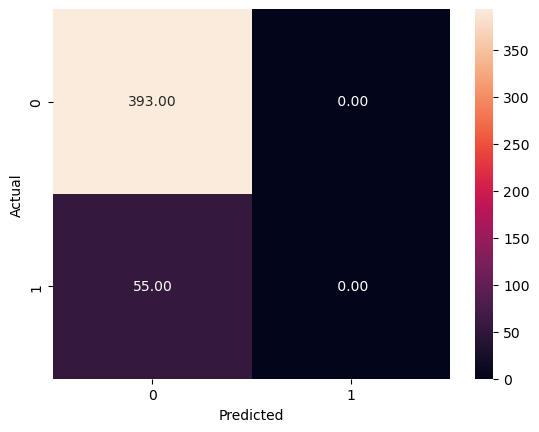

In [107]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='5.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.